In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
from glob import glob 
from fastcore.xtras import load_pickle
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
from scipy.stats import sem
from gptchem.plotsettings import *
from gptchem.plotutils import *
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH


In [36]:
results_before = glob("../03_classification/hea_single_vs_multiphase/out/**/*.pkl")

In [37]:
results_before = [load_pickle(f) for f in results_before]

In [38]:
extracted_res = []

for out in results_before:
    res = {
        "base_model": out["base_model"],
        "train_size": out["train_size"],
        "test_size": out["test_size"],
        "n_epochs": out["n_epochs"],
        "learning_rate_multiplier": out["learning_rate_multiplier"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
    }

    extracted_res.append(res)

In [39]:
extracted_res = pd.DataFrame(extracted_res)
extracted_res_grouped = extracted_res.groupby(["train_size"]).agg(["mean", "std", sem])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_89641/4280451115.py:2: FutureWarning: ['base_model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  extracted_res_grouped = extracted_res.groupby(["train_size"]).agg(["mean", "std", sem])


### CrabNet

In [50]:
crabnet = glob("../03_classification/hea_single_vs_multiphase/out-crabnet/*.pkl")

extracted_crabnet_res = []

for out in crabnet:
    out = load_pickle(out)
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
    }

    extracted_crabnet_res.append(res)
extracted_crabnet_res = pd.DataFrame(extracted_crabnet_res)
extracted_crabnet_res_grouped = extracted_crabnet_res.groupby("train_size").agg(
    ["mean", "std", sem]
)

### Automatminer

In [52]:
automatminer_out = glob("../03_classification/hea_single_vs_multiphase/out-baseline/**/*.pkl")
extracted_automatminer_res = []

for out in automatminer_out:
    out = load_pickle(out)
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
    }

    extracted_automatminer_res.append(res)

extracted_automatminer_res = pd.DataFrame(extracted_automatminer_res)

extracted_automatminer_res_grouped = extracted_automatminer_res.groupby("train_size").agg(
    ["mean", "std", sem]
)

### Test on "new" HEAs

In [58]:

all_results = glob('reports/*.pkl')
all_results  = [load_pickle(f) for f in all_results]

In [59]:
compiled_results = []

for result in all_results:
    res = {}
    res['accuracy'] = result['accuracy']
    res['f1_macro'] = result['f1_macro']
    res['f1_micro'] = result['f1_micro']
    res['kappa'] = result['kappa']
    res['acc_macro'] = result['acc_macro']
    res['train_size'] = result['train_size']

    compiled_results.append(res)

In [60]:
compiled_results = pd.DataFrame(compiled_results)

In [77]:
grouped_res = compiled_results.groupby('train_size').agg(['mean', 'std', sem, 'count'])

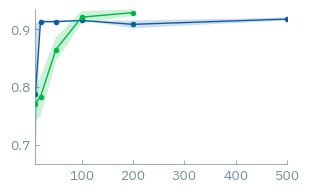

In [62]:
fig, ax = plt.subplots(figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_res.index, grouped_res['kappa']['mean'], label='Test on HEA not on Google', marker='o')
ax.fill_between(grouped_res.index, grouped_res['kappa']['mean'] - grouped_res['kappa']['sem'], grouped_res['kappa']['mean'] + grouped_res['kappa']['sem'], alpha=0.2)

ax.plot(extracted_res_grouped.index, extracted_res_grouped['kappa']['mean'], label='Test on HEA and Google', marker='o')
ax.fill_between(extracted_res_grouped.index, extracted_res_grouped['kappa']['mean'] - extracted_res_grouped['kappa']['sem'], extracted_res_grouped['kappa']['mean'] + extracted_res_grouped['kappa']['sem'], alpha=0.2)


In [63]:
extracted_res_grouped

test_size           n_epochs           learning_rate_multiplier  \
                mean  std  sem     mean  std  sem                     mean   
train_size                                                                   
10             250.0  0.0  0.0      8.0  0.0  0.0                     0.02   
20             250.0  0.0  0.0      8.0  0.0  0.0                     0.02   
50             250.0  0.0  0.0      8.0  0.0  0.0                     0.02   
100            250.0  0.0  0.0      8.0  0.0  0.0                     0.02   
200            250.0  0.0  0.0      8.0  0.0  0.0                     0.02   

                              frac_valid  ...  accuracy  f1_macro            \
            std           sem       mean  ...       sem      mean       std   
train_size                                ...                                 
10          0.0  1.156482e-18        1.0  ...  0.014498  0.884522  0.047488   
20          0.0  1.156482e-18        1.0  ...  0.017266  0.890336  0.056011   
50          0.0  1.156482e-18        1.0  ...  0.010506  0.932225  0.033577   
100         0.0  0.000000e+00        1.0  ...  0.005310  0.960406  0.015974   
200         0.0  1.156482e-18        1.0  ...  0.002696  0.964376  0.008544   

                      f1_micro                         kappa            \
                 sem      mean       std       sem      mean       std   
train_size                                                               
10          0.015017  0.885600  0.045848  0.014498  0.771200  0.091696   
20          0.017712  0.891600  0.054600  0.017266  0.783200  0.109200   
50          0.010618  0.932400  0.033224  0.010506  0.864800  0.066448   
100         0.005325  0.960444  0.015930  0.005310  0.920889  0.031861   
200         0.002702  0.964400  0.008527  0.002696  0.928800  0.017054   

                      
                 sem  
train_size            
10          0.028997  
20          0.034532  
50          0.021013  
100         0.010620  
200         0.005393  

[5 rows x 24 columns]

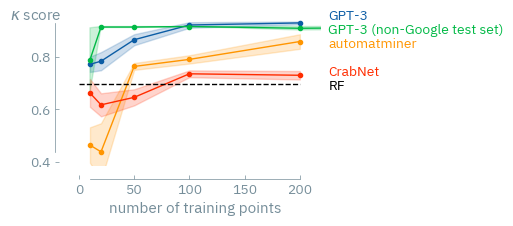

In [83]:
score = 'kappa'

fig, ax = plt.subplots(1, 1, figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))

ax.plot(
    extracted_res_grouped.index,
    extracted_res_grouped[score]["mean"],
    label="GPT-3",  
    marker="o",
)
ax.fill_between(
    extracted_res_grouped.index,
    extracted_res_grouped[score]["mean"] - extracted_res_grouped[score]["sem"],
    extracted_res_grouped[score]["mean"] + extracted_res_grouped[score]["sem"],
    alpha=0.2,
    color="C0",
)

ax.plot(
    grouped_res.index,
    grouped_res[score]["mean"],
    marker="o",
    label="GPT-3 (non-Google test set)",
)
ax.fill_between(
    grouped_res.index,
    grouped_res[score]["mean"] - grouped_res[score]["sem"],
    grouped_res[score]["mean"] + grouped_res[score]["sem"],
    alpha=0.2,
    color="C1",
)

ax.plot(
    extracted_automatminer_res_grouped.index,
    extracted_automatminer_res_grouped[score]["mean"],
    label="automatminer",
    marker="o",
    c="C2",
)
ax.fill_between(
    extracted_automatminer_res_grouped.index,
    extracted_automatminer_res_grouped[score]["mean"]
    - extracted_automatminer_res_grouped[score]["sem"],
    extracted_automatminer_res_grouped[score]["mean"]
    + extracted_automatminer_res_grouped[score]["sem"],
    alpha=0.2,
    color="C2",
)

ax.plot(
    extracted_crabnet_res_grouped.index,
    extracted_crabnet_res_grouped[score]["mean"],
    marker="o",
    label="CrabNet",
    c="C3",
)
ax.fill_between(
    extracted_crabnet_res_grouped.index,
    extracted_crabnet_res_grouped[score]["mean"] - extracted_crabnet_res_grouped[score]["sem"],
    extracted_crabnet_res_grouped[score]["mean"] + extracted_crabnet_res_grouped[score]["sem"],
    alpha=0.2,
    color="C3",
)


# add plot for this value
ax.plot(
    [0, 200],
    [0.697600, 0.697600],
     color="k", linestyle="--",
     label='RF'
)

range_frame(
    ax,
    extracted_res_grouped.index,
    np.stack(
        [extracted_res_grouped[score]["mean"].values.flatten(), 
            extracted_automatminer_res_grouped[score]["mean"].values.flatten(),
            extracted_crabnet_res_grouped[score]["mean"].values.flatten()]
    ).flatten(),
)


matplotx.line_labels(ax)

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("$\kappa$ score", ax=ax, x_pad=0.01, y_pad=0.12)


fig.savefig('kappa_score_overview.pdf', bbox_inches='tight')